In [1]:
pwd

'C:\\Users\\Hp\\Downloads'

#### Random Sample Imputation


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [34]:
df['Age'].dropna().sample()

37    21.0
Name: Age, dtype: float64

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=10)

728    25.0
555    62.0
426    28.0
278     7.0
617    26.0
       ... 
696    44.0
486    35.0
44     19.0
62     45.0
571    53.0
Name: Age, Length: 177, dtype: float64

In [15]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
def impute_nan(df,variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=10)
    #pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [23]:
median = df.Age.median()
median

28.0

In [24]:
impute_nan(df, 'Age',median)

In [25]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [26]:
pwd

'C:\\Users\\Hp\\Downloads'

In [28]:
df['Age'+"_median"] = df['Age'].fillna(median)
df.Age_median.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_median, dtype: float64

In [30]:
df['Age'+"_random"] = df['Age']
df.Age_random.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_random, dtype: float64

In [32]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=10)
random_sample

728    25.0
555    62.0
426    28.0
278     7.0
617    26.0
       ... 
696    44.0
486    35.0
44     19.0
62     45.0
571    53.0
Name: Age, Length: 177, dtype: float64

In [31]:
df['Age'].isnull().sum()

177

In [35]:
random_sample.index = df[df['Age'].isnull()].index

In [36]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

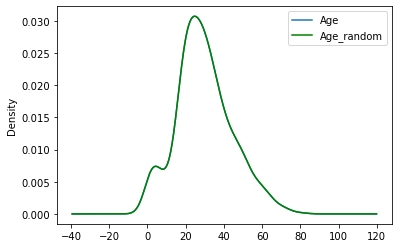

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Capturing NAN values with a new feature

It works well if the data are Not missing completely at random

In [41]:
df = pd.read_csv('train.csv',usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [44]:
df.Age.median()

28.0

In [46]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [47]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Capture the importance of missing values

#### Disadvantages
1. Creating additional features (Curse of dimentionality)

##### End of Distribution Imputation

In [48]:
df = pd.read_csv('train.csv',usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

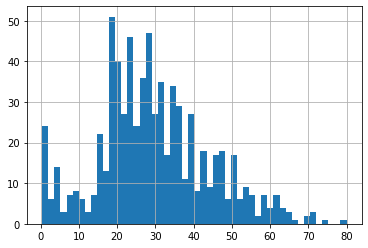

In [49]:
df.Age.hist(bins=50)

In [50]:
df.Age.mean()

29.69911764705882

In [51]:
df.Age.std()

14.526497332334044

In [52]:
3*df.Age.std()

43.57949199700213

In [56]:
extreme = df.Age.mean() + 3*df.Age.std()
extreme

73.27860964406095

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

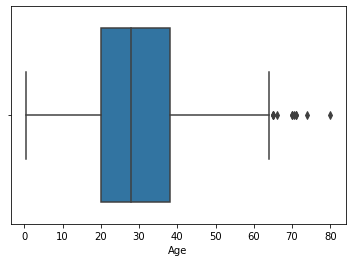

In [54]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [55]:
def impute_nan(df, variable, median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [57]:
impute_nan(df, 'Age', df.Age.median(),extreme)

In [58]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

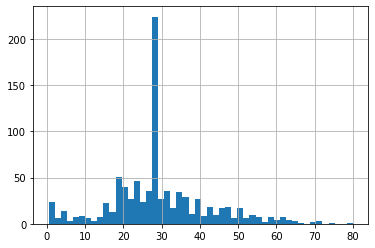

In [59]:
df['Age'].hist(bins=50)

<AxesSubplot:>

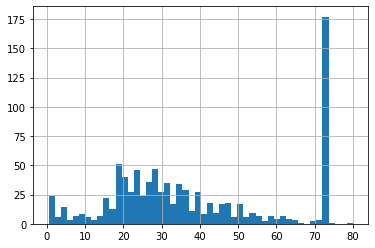

In [60]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

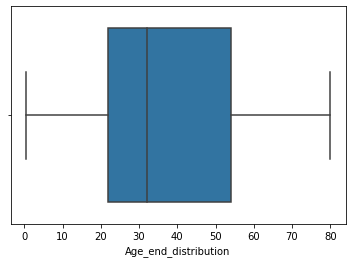

In [61]:
sns.boxplot('Age_end_distribution',data=df)